# Homework 1 : Batch Gradient Descent, Cost Optimization

## The Problem
Implement a linear regression algorithm as a gradient descent optimization that will measure how statistically dependent two variables are and apply the algorithm on the test datasets.

- The test dataset is historical fishery harvest and effort data for three groups of stakeholders
    1. Dipnet Fishermen
    2. Driftnet Fishermen
    3. Setnet Fishermen
- Data recorded on annual basis for last 15 - 30 years.
- Free variable : days fished (or permits issued)
- How correlated (or dependent) the harvest is on the fishermen's effort.

## The Procedure
- Implement regression model as cost optimization algorithm that uses batch gradient descent 
- The regression model should test function of batch size on model convergence
- Show error loss function (Y axis) over time (X axis) as function of tested batch size and number of training epochs
- Give all resulting parametric linear correlations for each dataset



## The Big Picture
- Gradient Descent : optimization algorithm often used for finding the weights or coefficients of machine learning algorithms. It works by having the model make predictions on training data and using the error on the predicitions to update the model in such a way as to reduce error.
- The goal is to find model weights that minimize the error of the model on the training dataset

The following is pseudocode for gradient descent

$ h_b(x) = b_0 + b_1x $

```python
model = initialization(...)
n_epochs = ...
train_data = ...
for i in n_epochs:
    train_data = shuffle(train_data)
```

We will use the Mean Squared Error as our loss function:
ERROR = $ ((b1*X1+b0 - Y1)^2 + (b1*X2+b0 - Y2)^2 + (b1*X3+b0 - Y3)^2) / 3 $


## After fitting the data
- Use R squared for goodness of fit
- R-squared: Percentage of response variation explain by linear model


# _Let's get started..._

***

## Part 1: Examine the data
The first step is to read the csv files, format the datasets as DataFrame objects, and examine the plots with regression lines based on default b0 and b1 weights.
Regression is a statistical model representing the relationship between two or more variables.

For linear regression, assumptions that will have to be made beforehand include:
- The data is uniformly distributed
- Hypothesis on free variable is within range
- N measurements > parameters
- Free variable is continuous

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

batch_sizes = [1,5,10,15,20]

# Load dataframes
dip_df = pd.read_csv("dip-har-eff.csv")
drift_df = pd.read_csv("drift-har-eff.csv")
set_df = pd.read_csv("set-har-eff.csv")

# Gather info
dip_rows = dip_df.shape[0]
dip_cols = dip_df.shape[1]

dip_df = dip_df.values
dip_df = dip_df[np.arange(0, dip_rows), :]

dip_X = dip_df[:,1]
dip_Y = dip_df[:,2]
dip_X_max = np.max(dip_X)
dip_Y_max = np.max(dip_Y)

dip_X = np.true_divide(dip_X, dip_X_max)
dip_Y = np.true_divide(dip_Y, dip_Y_max)

# Config pyplot
plt.xlim(0, max(dip_X))
plt.ylim(0, max(dip_Y))

(0, 1.0)

 b0: -0.339316182256 b1: 1.09220531178 Error: 0.337417295794
 b0: -0.264892625845 b1: 1.13072999998 Error: 0.0917151353063
 b0: -0.229424861683 b1: 1.14508840918 Error: 0.0375235158732
 b0: -0.211568024667 b1: 1.1485967281 Error: 0.0245261376136
 b0: -0.201690495472 b1: 1.14726239183 Error: 0.02090498544
 b0: -0.195445800008 b1: 1.14379506941 Error: 0.0196393187218
 b0: -0.190872185497 b1: 1.13941646146 Error: 0.0190570932912
 b0: -0.187083919792 b1: 1.13467689889 Error: 0.0187093069093
 b0: -0.183680792263 b1: 1.1298238001 Error: 0.018455865098
 b0: -0.180481674462 b1: 1.12496792231 Error: 0.0182463333675
 b0: -0.177404299833 b1: 1.12015837556 Error: 0.0180604969478
 b0: -0.174411018935 b1: 1.11541646949 Error: 0.0178896457479
 b0: -0.171484323474 b1: 1.1107509851 Error: 0.0177298091437
 b0: -0.168615802337 b1: 1.1061650652 Error: 0.0175790581027
 b0: -0.165801158271 b1: 1.10165932323 Error: 0.0174363656405
 b0: -0.163037959204 b1: 1.0972332457 Error: 0.0173011108425
 b0: -0.160324623

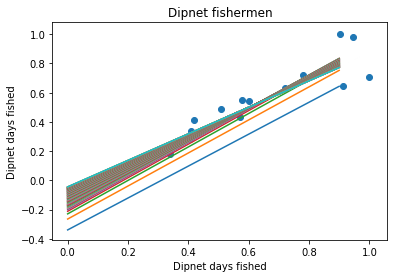

In [7]:
import matplotlib.pyplot as plt
import random

def calcMean(results):
    results_sum = sum(results)
    return results_sum / len(results)

def calcRSquared(predicted, actual):
    return predicted / actual

def calc_total_Error(row, col):
    return (b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b1*row+b0 - col) * row

def calc_b2_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col) * row**2

# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)  
    ERROR_SUM = sum(errorsList)
    return ERROR_SUM / batchSize

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

def takeRandomBatch(listLen, batchSize):
    return random.sample(range(listLen), batchSize)

# init weights
b1 = 1.0
b0 = -0.5
batchSize = 10

learn = 0.4

plt.xlabel('Dipnet days fished')
plt.ylabel('Dipnet days fished')
plt.title('Dipnet fishermen')
plt.scatter(dip_X, dip_Y)
plt.pause(0.1);

batchSample = takeRandomBatch(len(dip_X), batchSize)
sample_X = [dip_X[i] for i in sorted(batchSample)]
sample_Y = [dip_Y[i] for i in sorted(batchSample)]

for i in range(100):
    ERROR = mse(dip_X, dip_Y, calc_total_Error)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b1*X_test + b0)
    plt.pause(0.1)

plt.show()

In [24]:
def calcPrediction(b1, b0):
    return b1*18513+b0

print(calcPrediction(0.873221979884, -0.0248726166641))

16165.933640975827
